> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This is the second project in Data Analyst Nanodegree from Udacity. In this project, I analyzed <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download">No-show appointments dataset</a></li>. I'll share my discovery about it using Python libraries like pandas, numpy, matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

<a id='intro'></a>
## Dataset
**110,527 medical appointments, 14 associated variables (characteristics).**

> PatientId: Identity code of a patient.

> AppointmentID: Identification code of each appointment.

> Gender: Male (M) or Female (F).

> ScheduledDay: Effective date to make an appointment.

> AppointmentDay: The day of the actuall appointment to be seen by the doctor.

> Age: The length of time that a person has lived.

> Neighbourhood: Where the appointment takes place.

> Scholarship: True (1) of False (0).
Observation, this is a broad topic, consider reading this article here.

> Hipertension: True (1) or False (0).

> Diabetes: True (1) or False (0).

> Alcoholism: True (1) or False (0).

> Handcap: The handcap refers to the number of desabilites a patient has.

> SMS_received: 1 or more messages sent to the patient.

> No-show: Yes or No.

## Question(s) for Analysis 

- Number of peope that showed up in the neighborhood
- Does a gender showed up more than the other
- Does recieving sms aid patients to show up?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("KaggleV2-May-2016.csv")
# n = number of rows to be printed 
n = 7
# the first 7 rows
df.head(n)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
# number of samples and columns
df.shape


(110527, 14)

110,527 samples (rows) and 14 columns.

In [4]:
# brief data type info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking for wrong data type. ScheduledDay and AppointmentDay should be datetime and not object

In [5]:
# check for duplicated rows
df.duplicated().sum()

0

There is no duplicated values in the dataframe row

In [6]:
# columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Checking data type for all columns

In [7]:
# Number of unique values in each feature 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- there are 62,299 patient
- 27 appointment days
- 81 neighbourhood

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

average age is 37, minimum age is -1 and maximum age is 115. 
The minimum age is an error which will be corrected

In [10]:
# brief description of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


under the age column, max age is 115, min age is -1. This is an error that needs to be resloved. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning !!!

### Droping columns that won't be necessary (extraneous columns)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.shape

(110527, 12)

### Renaming colunms

In [12]:
# Renaming column No-show to show
df.rename(columns={'No-show': 'show'}, inplace=True)

In [13]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'show'],
      dtype='object')

In [14]:
def mod_string(col):
    """modifies a given string"""
    if 'day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    col = col.strip().lower().replace('-','_') # for example: No-show -> no_show
    return col
    
df.rename(columns = lambda x: mod_string(x), inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [98]:
# Find the analysis duration by substracting the min date and the max date
date_diff = df['appointment_day'].max() - df['appointment_day'].min()
date_diff

Timedelta('40 days 00:00:00')

this dataset was gotten in a period of 40 days

### Converting object data to pandas datetime

In [15]:
columns = ['scheduled_day', 'appointment_day']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)

df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
show                       object
dtype: object

### Fixing incorrect data

In [17]:
# find column where age is less than 0
negative_age = df[df['age'] < 0]
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Found row 99832 to have a negative age

In [18]:
# Dropping row 99832 
df.drop(negative_age.index, inplace=True)

In [19]:
# check negative age again
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show


### Changing column value to category for easy analysis

In [20]:
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [21]:
# if the value is greater than 1 change it to 1, otherwise keep it
df['handcap'] = np.where(df['handcap'] > 1, 1, df['handcap'])
# confirm
df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

In [22]:
df['show'].value_counts()

No     88207
Yes    22319
Name: show, dtype: int64

In [23]:
# if the value Yes then change it to 1, otherwise 0
df.show = np.where(df.show == "Yes", 1, 0)
# confirm
df.show.value_counts()

0    88207
1    22319
Name: show, dtype: int64

- 88,207 patient did not show up for their appointments
- 22,319 patients did

In [25]:
# Value count for each gender
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [72]:
# if the value Yes then change it to 1, otherwise 0 for sms recieved
df.sms_r = df.sms_received.map({1:'Yes', 0: 'No'})
df.sms_r.value_counts()

No     75039
Yes    35482
Name: sms_received, dtype: int64

This shows that 35,482 patients recieved a text message about their appointments


In [26]:
df.age.nunique()

103

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### If Patient show up column

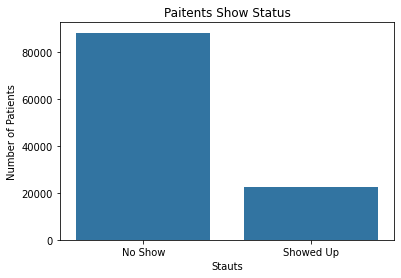

In [27]:
# ploting pie chat display the patient show status
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'show', color = base_color)
plt.title('Paitents Show Status')
plt.xticks([0, 1], ['No Show', 'Showed Up'])
plt.xlabel('Stauts')
plt.ylabel('Number of Patients');

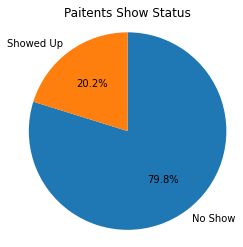

In [28]:
# ploting pie chat display the patient show status
sorted_counts = df.show.value_counts()
plt.pie(sorted_counts, labels = ['No Show', 'Showed Up'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

### Gender column

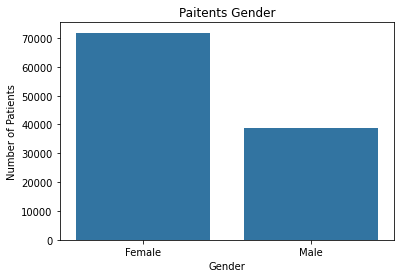

In [29]:
# ploting bar chat to display gender column
sns.countplot(data = df, x = 'gender', color = base_color)
plt.title('Paitents Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

### Age column

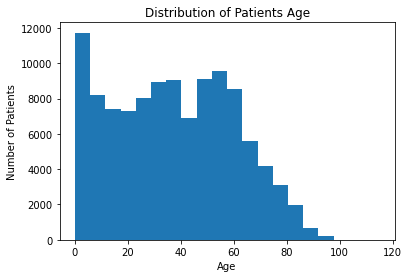

In [30]:
# Plotting histogram chart to display distribution of the age column
plt.hist(data = df, x = 'age', bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Age');

> Age distribution, most patient are in the age group of 0-10

### Scholarship column

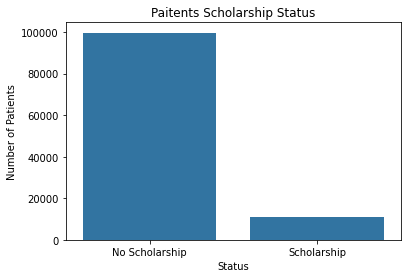

In [31]:
# plot a bar chart
sns.countplot(data = df, x = 'scholarship', color = base_color)
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

Higher percentages of the patients do not have a scholarship

### Handicapped colunm

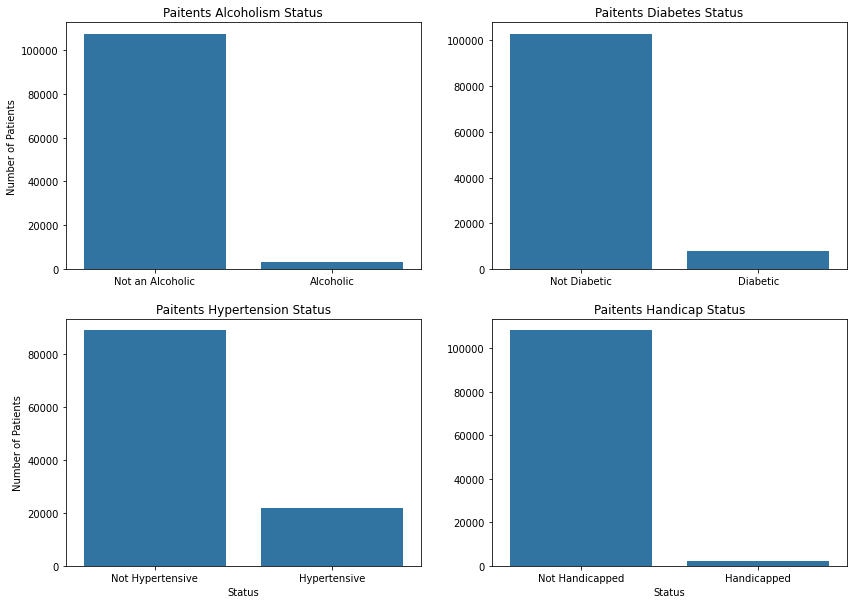

In [32]:


plt.figure(figsize = [14, 10]) # larger figure size for subplots

# alcoholism column
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
sns.countplot(data = df, x = 'alcoholism', color = base_color)
plt.title('Paitents Alcoholism Status')
plt.xticks([0, 1], ['Not an Alcoholic', 'Alcoholic'])
plt.xlabel('')
plt.ylabel('Number of Patients');

# diabetes column
plt.subplot(2, 2, 2) # 2 row, 2 cols, subplot 2
sns.countplot(data = df, x = 'diabetes', color = base_color)
plt.title('Paitents Diabetes Status')
plt.xticks([0, 1], ['Not Diabetic', 'Diabetic'])
plt.xlabel('')
plt.ylabel('');

# hipertension column
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
sns.countplot(data = df, x = 'hipertension', color = base_color)
plt.title('Paitents Hypertension Status')
plt.xticks([0, 1], ['Not Hypertensive', 'Hypertensive'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

# handcap column
plt.subplot(2, 2, 4) # 2 row, 2 cols, subplot 4
sns.countplot(data = df, x = 'handcap', color = base_color)
plt.title('Paitents Handicap Status')
plt.xticks([0, 1], ['Not Handicapped', 'Handicapped'])
plt.xlabel('Status')
plt.ylabel('');



Most patient did not suffer from been handicapped, an alcoholic, diabetic, or hypertensive 

### Creating new columns to answer Research questions

##### Age group classified into 5 range (using, min, 25%, 50%, 75% and max)

In [33]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

picking min, percental and max as my bin edge for creating a new column

In [34]:
bin_edges = [0, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,0


Text(0, 0.5, 'Number of Patients')

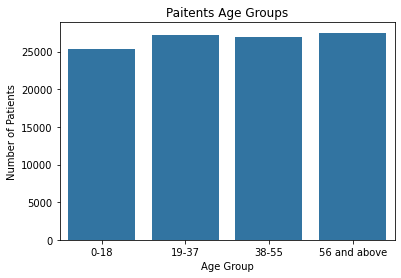

In [35]:
# plot a bar chart
sns.countplot(data = df, x = 'age_group', color = base_color)
plt.title('Paitents Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')

#### days_btw (days between scheduled_day and appointment_day)

In [36]:
# calculate the days between scheduled_day and appointment_day
days_btw = (df['appointment_day'] - df['scheduled_day']).dt.days #using .dt.days because we are calculating days
# inserting a new column (days_btw) before column 3
df.insert(3, 'days_btw', days_btw)
df.head(n)

,gender,scheduled_day,appointment_day,days_btw,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,0
5,F,2016-04-27,2016-04-29,2,76,REPÚBLICA,0,1,56 and above,0,0,0,0,0
6,F,2016-04-27,2016-04-29,2,23,GOIABEIRAS,0,0,19-37,0,0,0,0,1


In [37]:
# Checking for negative values in day_btw
negative_days = df.query('days_btw < 0')
negative_days

,gender,scheduled_day,appointment_day,days_btw,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,38-55,0,0,1,0,1
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,19-37,0,0,1,0,1
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,19-37,0,0,0,0,1
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,56 and above,0,0,0,0,1
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0-18,0,0,0,0,1


We canot have a negative value for the days between appoinment day and scheduled day because it a future reference.
So we remove the negative days. This data is incorrect and cannot be filled else the analysis will be wrong

In [38]:
# remove negative value from negative days
df.drop(negative_days.index, inplace=True)
# check again
df.query('days_btw < 0')

,gender,scheduled_day,appointment_day,days_btw,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show


#### waiting days(into 4 categories)

In [39]:
# view the min, 25%, 50%, 75%, max days_between values
df['days_btw'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_btw, dtype: float64

since we have two 0 (in min value and 25%,) we make min value -1 in the bin edge

In [40]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 4, 15, 179]
# labels for the four waiting period groups
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']
waiting_period = pd.cut(df['days_btw'], bin_edges, labels=bin_names)
# insert a new column (waiting_period) before column 4
df.insert(4, 'waiting_period', waiting_period)
df.head()

,gender,scheduled_day,appointment_day,days_btw,waiting_period,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29,2016-04-29,0,0 days,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,0 days,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,0 days,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,0 days,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,0 days,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,0


Text(0, 0.5, 'Number of Patients')

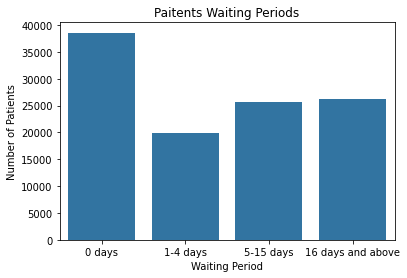

In [41]:
sns.countplot(data = df, x = 'waiting_period', color = base_color)
plt.title('Paitents Waiting Periods')
plt.xlabel('Waiting Period')
plt.ylabel('Number of Patients')

Most patient scheduled their appointment on the same day of call



#### Weekdays of the appointments

In [42]:
# find which day of the week the appointment was on using datetime
week_day = df.appointment_day.dt.weekday 
# insert a new column (week_day) before column 3
df.insert(3, 'week_day', week_day)
df.head()

,gender,scheduled_day,appointment_day,week_day,days_btw,waiting_period,age,neighbourhood,scholarship,hipertension,age_group,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29,2016-04-29,4,0,0 days,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,0
1,M,2016-04-29,2016-04-29,4,0,0 days,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,0
2,F,2016-04-29,2016-04-29,4,0,0 days,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,0
3,F,2016-04-29,2016-04-29,4,0,0 days,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,0
4,F,2016-04-29,2016-04-29,4,0,0 days,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,0


###### We cannot find appointment time because time format wasn't included in the datetime feature

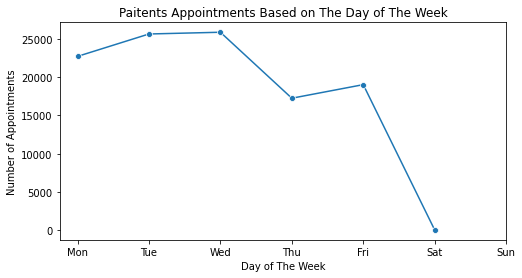

In [43]:
weekday_counts = df.week_day.value_counts()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = weekday_counts.index,  y = weekday_counts, marker='o')
plt.xticks(np.arange(0, 6+1), weekday_labels)
plt.title('Paitents Appointments Based on The Day of The Week')
plt.xlabel('Day of The Week')
plt.ylabel('Number of Appointments');

Most patients prefer to have their appoitments during the week (Wednesday, Tuesday and Monday)

### Research Question 1 (Number of peope that showed up in the neighborhood)

Text(0, 0.5, 'Neighbourhood')

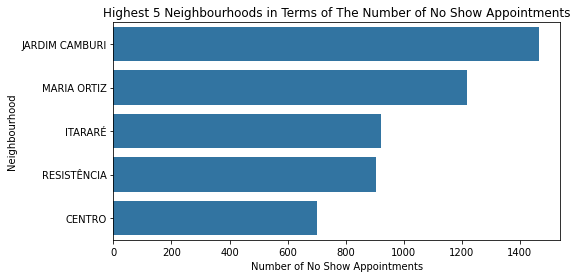

In [44]:
df_no_show = df[df['show'] == 1] 

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
cat_order = df_no_show['neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_no_show, y = 'neighbourhood', color = base_color, order = cat_order)
plt.title('Highest 5 Neighbourhoods in Terms of The Number of No Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood')

> The graph above showed  the neighbourhood that didnt show up for their appointments

### Research Question 2  (Does a gender showed up more than the other?)

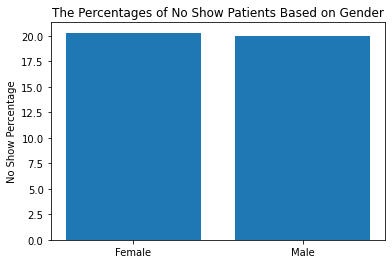

In [45]:
no_show_perc_gender = df.groupby('gender')['show'].mean() * 100

# plot a bar chart
plt.bar(x = no_show_perc_gender.index, height = no_show_perc_gender)
plt.title('The Percentages of No Show Patients Based on Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

The percentages of no show patients based on gender are close.

We can say that the gender might not be considered as a factor to predict if a patient will show up for their scheduled appointment.


In [46]:
no_show_perc_gender = df.groupby('gender')['show'].mean() * 100
no_show_perc_gender

gender
F    20.311543
M    19.963810
Name: show, dtype: float64

> From the result above, averagely, women showed up more than men with a little difference

### Research Question 3  (Is age a factor to predict if patient shows up?)

Text(0, 0.5, 'No Show Percentage')

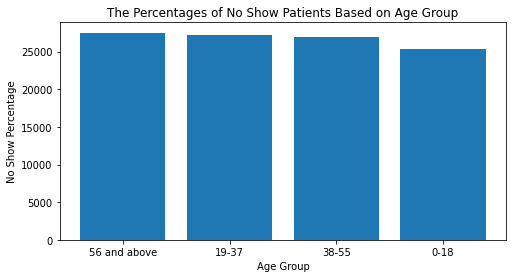

In [50]:
no_show_perc_age = df.age_group.value_counts()
# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('The Percentages of No Show Patients Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage')

From this plot, we can say the age group from 56 and above showed up more for their appointments compared to other age groups, 0-18 least showed up for their appointments

### Research Question 4  (Is the day of the week a factor to consider if patient will show up?)

Text(0, 0.5, 'No Show Percentage')

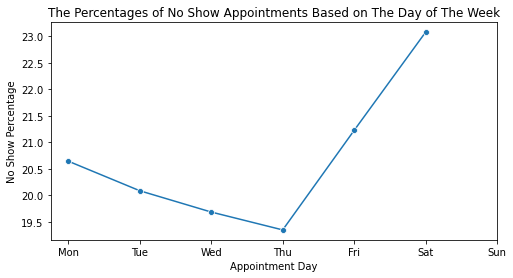

In [52]:
no_show_perc_weekday = df.groupby('week_day')['show'].mean() * 100

# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = no_show_perc_weekday.index,  y = no_show_perc_weekday, marker='o')
plt.title('The Percentages of No Show Appointments Based on The Day of The Week')
plt.xticks(np.arange(0, 6+1), weekday_labels)
plt.xlabel('Appointment Day')
plt.ylabel('No Show Percentage')

Patients miss their appointments on saturdays. 23% of appointments were missed on saturday and patients prefer to show up on thursday

### Research Question 4  (Is recieving sms a factor to consider if patients will show up?)

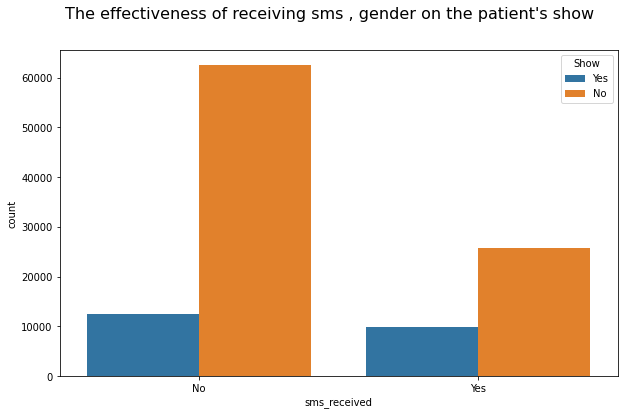

In [87]:
fig, ax1 = plt.subplots()
hue_order=[1,0]

# sns.countplot(x='gender', data=df, ax=ax1, hue_order=hue_order, color= base_color, hue='show', palette='Paired')
sns.countplot(x= sms_mapping, data=df, hue_order=hue_order, hue='show')
fig.set_figwidth(10)
fig.set_figheight(6)
fig.suptitle("The effectiveness of receiving sms , gender on the patient's show", fontsize=16);
# ax1.set(xlabel='Gender', ylabel='Count')
ax2.set(xlabel='SMS Received', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right', title='Show',labels=['Yes', 'No'])

The data are not enough to determine this question. People that recieved sms did not really show up for their appointment 

<a id='conclusions'></a>
## Conclusions

> In this project I have analyzed No show Appointment Dataset and shared my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset contained 110,527 appointments in a period of 40 days, about 20% of the patients didn't show up for their appointments.

- Patients who show up on their appointments represents 79.8%
- Patients who Don't show up on their appointments represents 20.2%
- Adults from 18 to 37 years old are the highest missed show up
- JARDIM CAMBURI is the most frequent place.
- Patients will likely miss their appointments during weekends
- SMS slightly affect on patient's showing up.


### Limitations




- This is a old data(2016, over 6years ago), perherps getting an updated data will be better 
- This data was gotten in a short period of time (40 days)
- data relating to patients wasn't given (employment status, income, marital status etc)
